I Want to plot all the anagles here 
1) omega ref A & B  2) omega dual A & B 
COLLECT ALL 4 figures in one figure 
3) phi & psi ref A & B  4) phi & psi dual A & B
Collect ALL 4 figures in just one  

In [1]:
import MDAnalysis as mda
from MDAnalysis.analysis import dihedrals
from MDAnalysis.analysis.data.filenames import Rama_ref
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams["font.family"] = "serif"

## 1) omega 4 angles  RefA RefB DualA DualB

In [2]:
# define the rep0 and rep last directories 
##########################################
dir1="ref3"  #  TODO : NEEDED AS INPUT 
dir2="dual3" # TODO : NEEDED AS INPUT 
cwd = os.getcwd()
# Get info about the last replica from directories to its save 
os.chdir(f"{cwd}/../{dir1}/prodrun/")
files = []
for i in range(1, 200):  # of course I will not have replicals more than 200 if so change this number
    if os.path.exists(str("rep"+str(i))):
        files.append(i)
    else:
        continue
replast_no = max(files)


In [3]:
# Define the residues for each case 
targetresid=73  # TODO: NEEDED AS INPUT 
modified_res=172  # TODO: NEEDED AS INPUT 
targetresid = int(targetresid)
targetresidsA = [ targetresid-2 ,targetresid-1, targetresid,
                targetresid+1]  # FIXME: if u want to modify the residues 
targetresidsB = [ targetresid-2 , modified_res, targetresid+1] 

targetresidsA_dual = [ targetresid-3,targetresid-2 ,targetresid-1, targetresid,
                targetresid+1,targetresid+2]
targetresidsB_dual = [ targetresid-3, targetresid-2 , modified_res, targetresid+1,targetresid+2]
print(targetresidsA)
print(targetresidsB)
print(targetresidsA_dual)
print(targetresidsB_dual)
# In case of Omega  as (3 for state A and 2 for state B) So use targetresidsA & B in omega
# In  PHI & PSI  as dual ( 5 stA + 4 stB) so  So use targetresidsA & B for ref in phi_psi and targetresidsA_dual & B_dual for dual

[71, 72, 73, 74]
[71, 172, 74]
[70, 71, 72, 73, 74, 75]
[70, 71, 172, 74, 75]


In [ ]:
# This function is good and working to get data and plot one figure one time 
#However to plot all figures in subplots its better to use another function instead to get the data then directly plot all figures in the subplots 
# which I am currently use after this one 
def omega_plot(dir, state, residues):
    # dir = dir2 # ref  TODO should be added in function parameters
    # state = "A"  # TODO should be added in function parameters

    # define the pathes of first replica & last one
    rep0 = f"{cwd}/../{dir}/prodrun/rep0/"
    replast = f"{cwd}/../{dir}/prodrun/rep{replast_no}/"
     # chnage dir to rep0 or last rep based on state A or B entered
    if state == "A":
        os.chdir(rep0)
    elif state == "B":
        os.chdir(replast)

    fig = plt.figure(figsize=(18, 12))
    plt.rc('xtick', labelsize=16)
    plt.rc('ytick', labelsize=16)
    ax = fig.add_axes([0.2, 0.2, 0.8, 0.8])
    ax.set_xlim(-360, 360)
    n=3 # TODO: NEEDED as parameter in function  
    ax.set_prop_cycle('color', [plt.cm.jet(i) for i in np.linspace(0,1,n)])
    ax.set_title(
        f"The $\omega$ angle distribution {dir} State {state}", fontsize=20)
    ax.set_xlabel('$\omega$', fontsize=24, color='black')
    ax.set_ylabel('Distribution', fontsize=24, color='black')

    residue_order = residues # TODO: NEEDED as parameter in function  
    for i in range(len(residue_order) - 1):
        res1 = residue_order[i]
        res2 = residue_order[i + 1]
        with open(f"omega_{res1}_{res2}_.xvg") as f:
            data=f.readlines()
            omega_angle=[]
            for line in data:
                if "#" in line or "@" in line:
                        continue
                else:
                    omega_angle.append(float(line.split()[1]))
            plt.hist(omega_angle, histtype="step", bins=100, density=True,linewidth = 2);
    plt.show();
    for axis in ['top', 'bottom','left','right']:
        ax.spines[axis].set_linewidth(2)
        # print(res1,res2)
    return fig

In [ ]:
# omega_plot(dir1, "B", targetresidsB)
# omega_plot(dir2, "B", targetresidsB)
# omega_plot(dir2, "A", targetresidsA)

In [4]:
def pick_up_omega_angles(dir, state, residues):
    #This function to pick up all the omega angles of one for one state 
    # As example for ref state A we have three angles then we will get list including three big lists omega angle1 2 3 
# dir=dir1
# state= "A" 
# residues= targetresidsA
        # define the pathes of first replica & last one
        rep0 = f"{cwd}/../{dir}/prodrun/rep0/"
        replast = f"{cwd}/../{dir}/prodrun/rep{replast_no}/"
        # chnage dir to rep0 or last rep based on state A or B entered
        if state == "A":
            os.chdir(rep0)
        elif state == "B":
            os.chdir(replast)
        residue_order = residues 
        omega_data=[]
        for i in range(len(residue_order) - 1):
            res1 = residue_order[i]
            res2 = residue_order[i + 1]
            with open(f"omega_{res1}_{res2}_.xvg") as f:
                data=f.readlines()
                omega_angle=[]
                for line in data:
                    if "#" in line or "@" in line:
                            continue
                    else:
                        omega_angle.append(float(line.split()[1]))
            omega_data.append(omega_angle)
        return omega_data

In [5]:
refA=pick_up_omega_angles(dir1, "A", targetresidsA)
refB=pick_up_omega_angles(dir1, "B", targetresidsB)
dualB=pick_up_omega_angles(dir2, "B", targetresidsB)
dualA=pick_up_omega_angles(dir2, "A", targetresidsA)

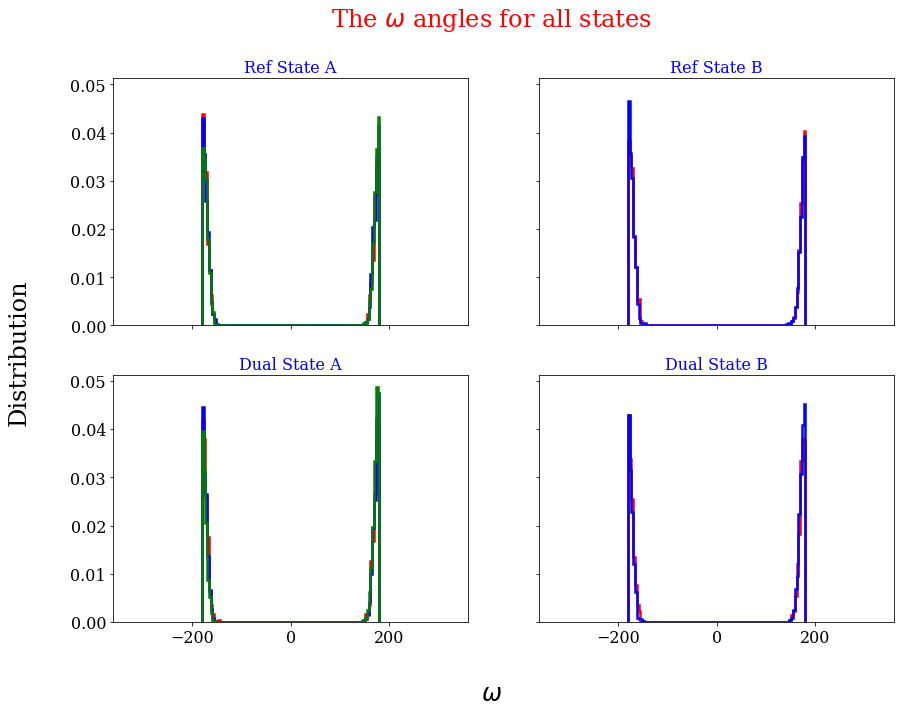

In [19]:
#TODO : think to change the axes to control one like that one in the next function  
# plot omega angles of the four states refA (3 angles) refB (2 angles) dualA (3 angles) dualB  (2 angles) in one figure 
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True,figsize=(14,10))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)

# plot all data for each case in one graph like RefA in one grap and RefB in another graph 
color=["red","blue","green"]
for i in range(len(refA)):
    axes[0,0].hist(refA[i], histtype="step", color=color[i] , bins=100, density=True,linewidth = 2.5);
for i in range(len(refB)):
    axes[0,1].hist(refB[i], histtype="step", color=color[i] , bins=100, density=True,linewidth = 2.5);
for i in range(len(dualA)):
    axes[1,0].hist(dualA[i], histtype="step", color=color[i] , bins=100, density=True,linewidth = 2.5);
for i in range(len(dualB)):
    axes[1,1].hist(dualB[i], histtype="step", color=color[i] , bins=100, density=True,linewidth = 2.5);

# # Add refA to the axes 
# axes[0,0].hist(refA[0], histtype="step", color="blue" , bins=100, density=True,linewidth = 2.5);
# axes[0,0].hist(refA[1], histtype="step", color="red" , bins=100, density=True,linewidth = 2.5);
# axes[0,0].hist(refA[2], histtype="step", color="green" , bins=100, density=True,linewidth = 2.5);

# Defining custom 'xlim' and 'ylim' values.
plt.setp(axes, xlim=(-360, 360)) # if you need use ylim 

# NOTE : To write omega in latex  $\omega$
# To write titke for each subplot 
axes[0,0].set_title("Ref State A"   , fontsize=16, color='blue')
axes[0,1].set_title("Ref State B"   , fontsize=16, color='blue')
axes[1,0].set_title("Dual State A"  , fontsize=16, color='blue')
axes[1,1].set_title("Dual State B"  , fontsize=16, color='blue')
fig.suptitle('The $\omega$ angles for all states', fontsize=24, color='red')
fig.supxlabel('$\omega$', fontsize=24, color='black')
fig.supylabel('Distribution', fontsize=24, color='black')

fig.savefig(f'{cwd}/../omega_angles_{dir1}_{dir2}_upto_step9.png', bbox_inches='tight', dpi=300)
plt.show()


## 2) RAMACHANDRAN PLOT  RefA RefB DualA DualB

In [4]:
# Build function to pick up all the data and save it in list 
def pick_up_phi_psi_angles(dir, state, residues):
    # define the pathes of first replica & last one
    rep0 = f"{cwd}/../{dir}/prodrun/rep0/"
    replast = f"{cwd}/../{dir}/prodrun/rep{replast_no}/"
        # chnage dir to rep0 or last rep based on state A or B entered
    if state == "A":
        os.chdir(rep0)
    elif state == "B":
        os.chdir(replast)
    # Choose the residue order 4 or 3 based on the dual or ref  
    residue_order = residues
    phi_data=[]
    psi_data=[] 
    for i in range(len(residue_order) - 1):
        res1 = residue_order[i]
        res2 = residue_order[i + 1]
        with open(f"phi_{res1}_{res2}_test.xvg") as f:
            data=f.readlines()
            phi_angle=[]
            for line in data:
                if "#" in line or "@" in line:
                        continue
                else:
                    phi_angle.append(float(line.split()[1]))
        phi_data.append(phi_angle)          
        with open(f"psi_{res1}_{res2}_test.xvg") as f2:
            data=f2.readlines()
            psi_angle=[]
            for line in data:
                if "#" in line or "@" in line:
                        continue
                else:
                    psi_angle.append(float(line.split()[1]))   
        psi_data.append(psi_angle) 
    return phi_data , psi_data  



In [5]:
phi_refA,psi_refA=pick_up_phi_psi_angles(dir1, "A", targetresidsA)
phi_refB,psi_refB=pick_up_phi_psi_angles(dir1, "B", targetresidsB)
phi_dualA,psi_dualA=pick_up_phi_psi_angles(dir2, "A", targetresidsA_dual)
phi_dualB,psi_dualB=pick_up_phi_psi_angles(dir2, "B", targetresidsB_dual)

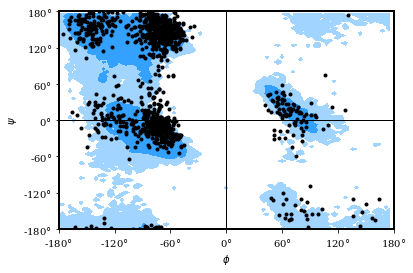

In [7]:
# def ramachandran_plot(dir, state, residues):
dir=dir1  # ref 
state="A" 
residues= targetresidsA
# define the pathes of first replica & last one
rep0 = f"{cwd}/../{dir}/prodrun/rep0/"
replast = f"{cwd}/../{dir}/prodrun/rep{replast_no}/"
    # chnage dir to rep0 or last rep based on state A or B entered
if state == "A":
    os.chdir(rep0)
elif state == "B":
    os.chdir(replast)

# residue_order = residues 
# for i in range(len(residue_order) - 1):
#     res1 = residue_order[i]
#     res2 = residue_order[i + 1]
res1 = 72
res2= 73
with open(f"phi_{res1}_{res2}_test.xvg") as f:
    data=f.readlines()
    phi_angle=[]
    for line in data:
        if "#" in line or "@" in line:
                continue
        else:
            phi_angle.append(float(line.split()[1]))

res1 = 73
res2= 74
with open(f"psi_{res1}_{res2}_test.xvg") as f2:
    data=f2.readlines()
    psi_angle=[]
    for line in data:
        if "#" in line or "@" in line:
                continue
        else:
            psi_angle.append(float(line.split()[1]))   
            
ax = plt.gca()
ax.axis([-180, 180, -180, 180])
ax.axhline(0, color='k', lw=1)
ax.axvline(0, color='k', lw=1)
ax.set(xticks=range(-180, 181, 60), yticks=range(-180, 181, 60),
    xlabel=r"$\phi$", ylabel=r"$\psi$")
degree_formatter = plt.matplotlib.ticker.StrMethodFormatter(
    r"{x:g}$\degree$")
ax.xaxis.set_major_formatter(degree_formatter)
ax.yaxis.set_major_formatter(degree_formatter)
X, Y = np.meshgrid(np.arange(-180, 180, 4),np.arange(-180, 180, 4))
levels = [1, 17, 15000]
colors = ['#A1D4FF', '#35A1FF']
ax.contourf(X, Y, np.load(Rama_ref), levels=levels, colors=colors)
ax.scatter(phi_angle,psi_angle,color='black', marker='.')  


for axis in ['top', 'bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
    # print(res1,res2)
# return fig

In [25]:
# phi_refA,psi_refA=pick_up_phi_psi_angles(dir1, "A", targetresidsA)
# phi_refB,psi_refB=pick_up_phi_psi_angles(dir1, "B", targetresidsB)
# phi_dualA,psi_dualA=pick_up_phi_psi_angles(dir2, "A", targetresidsA_dual)
phi_dualB,psi_dualB=pick_up_phi_psi_angles(dir2, "B", targetresidsB_dual)

In [100]:
# # IMP NOTE FROM Sakuraba-san 
# fig, axes = plt.subplots(2, 2)
# print(axes)
# print(type(axes))
# ax = [axes[i,j] for i in range(2)  for j in range(2) ]
# print(len(ax), ax)
# ax[0].plot(x, y)
# ax[1].plot(x, y)
# ax[2].plot(x, y)
# ax[3].plot(x, y)


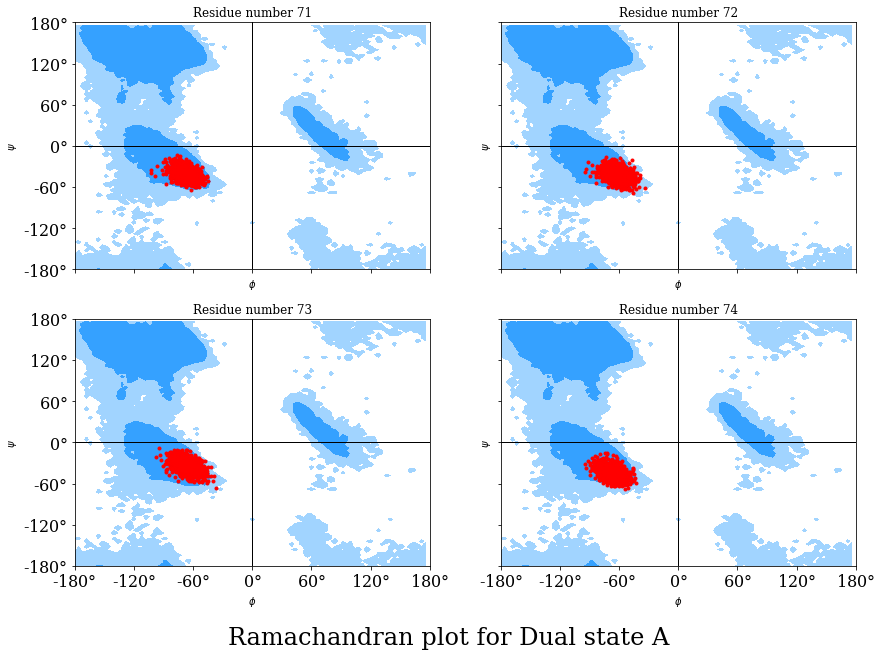

In [71]:
# TODO : U can make this one as function for all the 4 cases refA B dualA B 

# 1)  plot RAMACHANDRAN for angles of dual A case ( 4 plots ) 
# cases=4
# # cases=2
# if cases==4:
#     fig, ((ax[0], ax[1]), (ax[2], ax[3])) = plt.subplots(2, 2, sharex=True, sharey=True,figsize=(14,10))
# if cases==2:
#     fig, ((ax[1], ax[2])) = plt.subplots(2, 1, sharex=True, sharey=True ,figsize=(8,10)) #,figsize=(14,10)


fig, axes = plt.subplots(2, 2, sharex=True, sharey=True,figsize=(14,10))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)


ax = [axes[i, j] for i in range(2) for j in range(2)]



# fig1, ((ax[1], ax[2]), (ax[3], ax[4])) = plt.subplots(2, 2)
# ax[1].plot(x, y)
# ax[2].plot(x, y)
# ax[3].plot(x, y)
# ax[4].plot(x, y)

# i=[0, 0 , 1, 1]  # TODO : HOW to get this inofrmation automatic for each figure in diff 4 cases 
# j=[0, 1, 0, 1] 
# j=[0,1,2,3]
for i in range(len(phi_dualA)-1): # as angles equal residues - 1 
    ax[i].axis([-180, 180, -180, 180])
    ax[i].axhline(0, color='k', lw=1)
    ax[i].axvline(0, color='k', lw=1)
    ax[i].set(xticks=range(-180, 181, 60), yticks=range(-180, 181, 60),
        xlabel=r"$\phi$", ylabel=r"$\psi$")
    degree_formatter = plt.matplotlib.ticker.StrMethodFormatter(
    r"{x:g}$\degree$")
    ax[i].xaxis.set_major_formatter(degree_formatter)
    ax[i].yaxis.set_major_formatter(degree_formatter)
    X, Y = np.meshgrid(np.arange(-180, 180, 4),np.arange(-180, 180, 4))
    levels = [1, 17, 15000]
    colors = ['#A1D4FF', '#35A1FF']
    ax[i].contourf(X, Y, np.load(Rama_ref), levels=levels, colors=colors)
    # for axis in ['top', 'bottom','left','right']:
    #     ax.spines[axis].set_linewidth(2)
    # IMP Line for plot the data  
    ax[i].scatter(phi_dualA[i],psi_dualA[i+1],color='red', marker='.')  
    # NOTE : phi1 & psi2 as first residue phi is phi1 but psi is psi2 based on psi defination 


# test=phi_dualA   #TODO : u have to make this one also automatic 

# for i in range(len(test)-1): # As the number or angles in RAMACH = total angles(residues)-1
#     ax[i].scatter(phi_dualA[i],psi_dualA[i+1],color='red', marker='.')  

# ax[0].scatter(phi_dualA[0],psi_dualA[1],color='red', marker='.')  
# ax[1].scatter(phi_dualA[1],psi_dualA[2],color='red', marker='.')  
# ax[2].scatter(phi_dualA[2],psi_dualA[3],color='red', marker='.')  
# ax[3].scatter(phi_dualA[3],psi_dualA[4],color='red', marker='.')  

# for axis in ['top', 'bottom','left','right']:
#     ax.spines[axis].set_linewidth(2)





# NOTE : To write omega in latex  $\omega$
# To write titke for each subplot 
ax[0].set_title("Residue number 71") #TODO : write this number automatic 
ax[1].set_title("Residue number 72")
ax[2].set_title("Residue number 73")
ax[3].set_title("Residue number 74")


fig.supxlabel('Ramachandran plot for Dual state A ', fontsize=24, color='black') #TODO : pick this state  automatic 
# fig.supylabel('Distribution', fontsize=24, color='black')
plt.show()


0 0
0 1
1 0
1 1


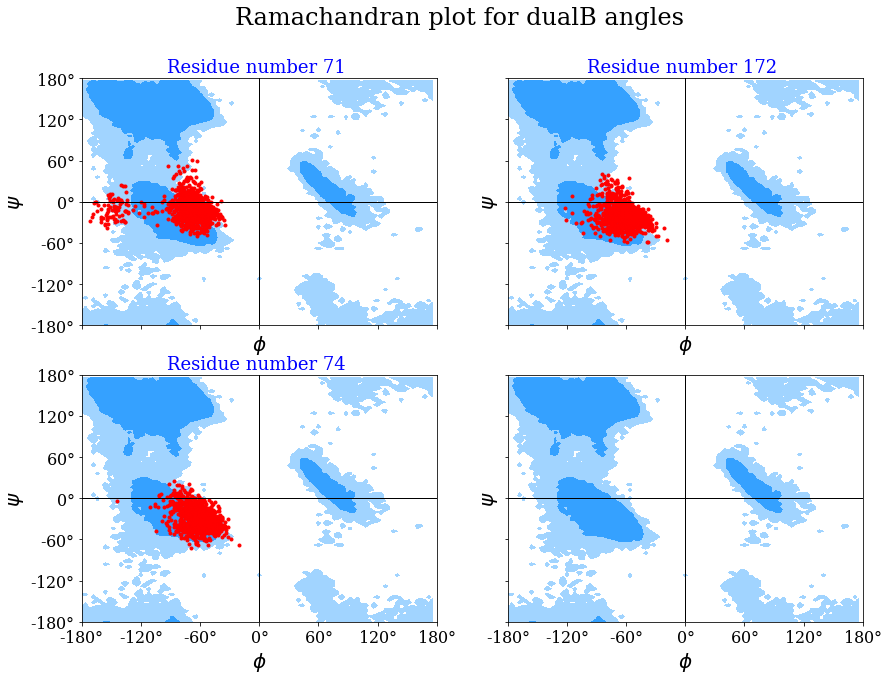

In [48]:
# 2) plot RAMACHANDRAN for angles of dual B case ( 3 plots ) 
residues= targetresidsB_dual
case="dualB"

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True,figsize=(14,10))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)


i=[0, 0 , 1, 1]  # TODO : HOW to get this inofrmation automatic for each figure in diff 4 cases 
j=[0, 1, 0, 1] 
for i,j in zip(i,j):
    axes[i,j].axis([-180, 180, -180, 180])
    axes[i,j].axhline(0, color='k', lw=1)
    axes[i,j].axvline(0, color='k', lw=1)
    axes[i,j].set(xticks=range(-180, 181, 60), yticks=range(-180, 181, 60),
        xlabel=r"$\phi$", ylabel=r"$\psi$", )
    #control the label size after creation 
    axes[i,j].xaxis.label.set_size(20)
    axes[i,j].yaxis.label.set_size(20)
    degree_formatter = plt.matplotlib.ticker.StrMethodFormatter(
    r"{x:g}$\degree$")
    axes[i,j].xaxis.set_major_formatter(degree_formatter)
    axes[i,j].yaxis.set_major_formatter(degree_formatter)
    X, Y = np.meshgrid(np.arange(-180, 180, 4),np.arange(-180, 180, 4))
    levels = [1, 17, 15000]
    colors = ['#A1D4FF', '#35A1FF']
    axes[i,j].contourf(X, Y, np.load(Rama_ref), levels=levels, colors=colors)
    print(i,j)
axes[0,0].scatter(phi_dualB[0],psi_dualB[1],color='red', marker='.')  
axes[0,1].scatter(phi_dualB[1],psi_dualB[2],color='red', marker='.')  
axes[1,0].scatter(phi_dualB[2],psi_dualB[3],color='red', marker='.')  
# axes[1,1].scatter(p_duphi_dualBh_psi_dualBi_dualsi_dualA[4],color='red', marker='.')  

#pickup the title name automatic 
# residue_order = targetresidsB_dual
# for i in range(len(residue_order) - 1):
#     res1 = residue_order[i]
#     res2 = residue_order[i + 1]


# NOTE : To write omega in latex  $\omega$
# To write titke for each subplot 
axes[0,0].set_title(f"Residue number {residues[1]} "  , fontsize=18, color='blue')  #71      
axes[0,1].set_title(f"Residue number {residues[2]} "  , fontsize=18, color='blue')  #172
axes[1,0].set_title(f"Residue number {residues[3]} "  , fontsize=18, color='blue')   # 74
# axes[1,1].set_title("Residue number 74")

fig.suptitle(f'Ramachandran plot for {case} angles', fontsize=24, color='black')

#fig.supxlabel('Ramachandran plot for Dual state B ', fontsize=24, color='black') #TODO : pick this state  automatic 
# fig.supylabel('Distribution', fontsize=24, color='black')
plt.show()


# Make all 4 figures by one function 

In [140]:
# one function for all cases together recognize them then plot the appropriat fig. 
def ramachandran_plot(dir,residues,case,phi,psi):
    # Using dir only for name saved in last step
# dir=dir1  # ref 
# state="A" 
# residues= targetresidsB_dual
# case="dualB"
# phi=phi_dualB
# psi=psi_dualB
    # decide the number of plots from the ref =2  or dual =4
    if case.strip()[:-1]=="ref":
        fig, axes = plt.subplots(2, 1, sharex=True, sharey=True ,figsize=(8,10)) #,figsize=(14,10)
         # TO be able to access the axes by this way ax[0], ax[1] so on 
        ax = [axes[i] for i in range(2) ]   # [axes[0],axes[1]]
    if case.strip()[:-1]=="dual":
        fig, axes = plt.subplots(2, 2, sharex=True, sharey=True,figsize=(14,10))
        # TO be able to access the axes by this way ax[0], ax[1] so on 
        ax = [axes[i, j] for i in range(2) for j in range(2)] #[axes[0,0],axes[0,1],axes[1,0],axes[1,1]]
  
    plt.rc('xtick', labelsize=16)
    plt.rc('ytick', labelsize=16)
    
    # color={
    #     "71":"red",
    #     "72":"darkgreen",
    #     "172":"darkgreen",
    #     "73":"gold",
    #     "74":"indigo"
    # }
    for i in range(len(phi)-1): # as angles equal residues - 1 
        #Plot the common parts of the 4 figures 
        ax[i].axis([-180, 180, -180, 180])
        ax[i].axhline(0, color='k', lw=1)
        ax[i].axvline(0, color='k', lw=1)
        ax[i].set(xticks=range(-180, 181, 60), yticks=range(-180, 181, 60),
             ) # this one used for phi psi for each figure  # xlabel=r"$\phi$", ylabel=r"$\psi$",
        # control the label size after creation 
        ax[i].xaxis.label.set_size(20)
        ax[i].yaxis.label.set_size(20)
        degree_formatter = plt.matplotlib.ticker.StrMethodFormatter(
        r"{x:g}$\degree$")
        ax[i].xaxis.set_major_formatter(degree_formatter)
        ax[i].yaxis.set_major_formatter(degree_formatter)
        X, Y = np.meshgrid(np.arange(-180, 180, 4),np.arange(-180, 180, 4))
        levels = [1, 17, 15000]
        colors = ['#A1D4FF', '#35A1FF']
        ax[i].contourf(X, Y, np.load(Rama_ref), levels=levels, colors=colors)
        
        # adjust certain color for specific angle, we use dictiionary instead of normal list 
        color={
            f"{targetresidsA[0]}":"red",
            f"{targetresidsA[1]}":"darkgreen",
            f"{targetresidsB[1]}":"darkgreen",
            f"{targetresidsA[2]}":"gold",
            f"{targetresidsA[3]}":"indigo"
        }     
        # IMP Line for plot the data  color[f"{targetresidsA_dual[1]}"]
        ax[i].scatter(phi[i],psi[i+1],c=color[f"{residues[i+1]}"], marker='.')  # NOTE : phi1 & psi2 as first residue phi is phi1 but psi is psi2 based on psi defination 

        # Add title for each one based on rediues number 
        ax[i].set_title(f"Residue number {residues[i+1]} "  , fontsize=18, color='blue')
        for axis in ['top', 'bottom','left','right']:
            ax[i].spines[axis].set_linewidth(2)

    fig.supxlabel('$\phi$ ', fontsize=24, color='black')
    fig.supylabel('$\psi$', fontsize=24, color='black')
    fig.suptitle(f'Ramachandran plot for {case.strip()[:-1]} {case.strip()[-1]} angles', fontsize=24, color='black')
    #fig.savefig(f'{cwd}/../ramchandran_plot_{dir}_upto_step9_{case}.png', bbox_inches='tight', dpi=300)
   
    
    plt.show()


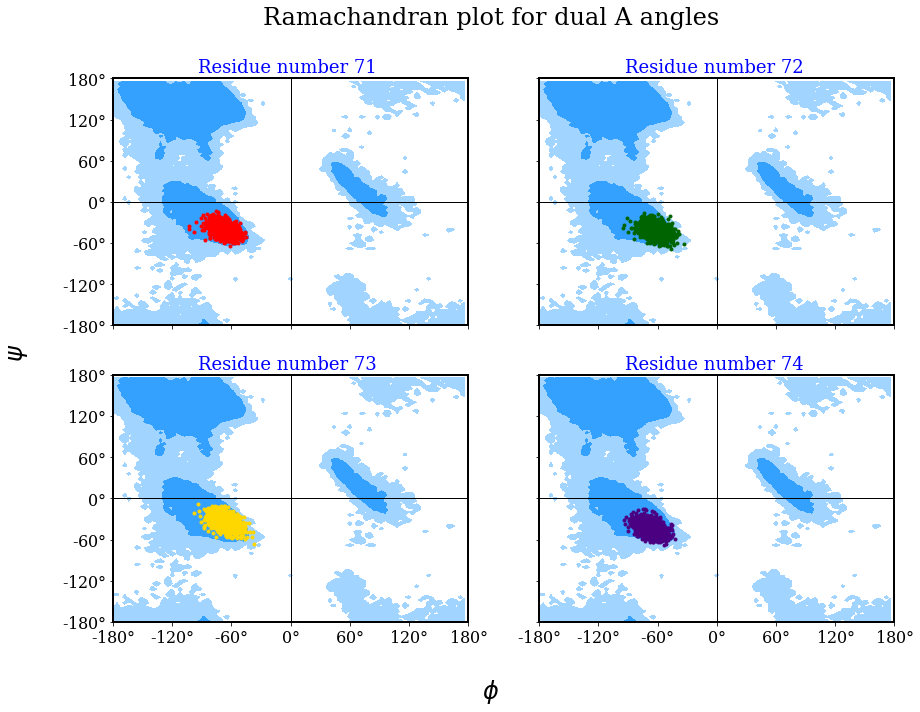

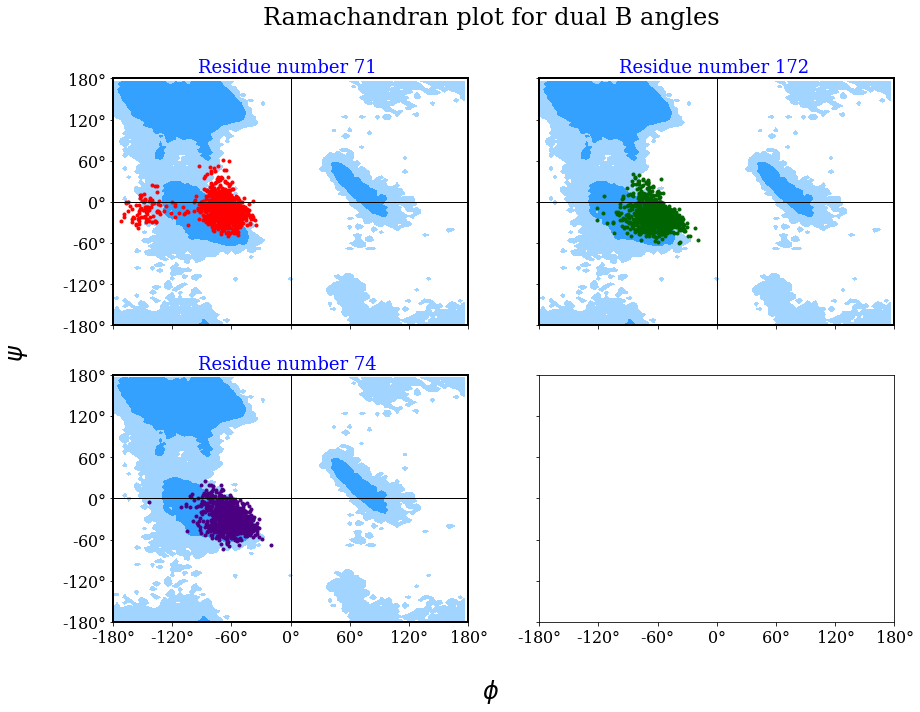

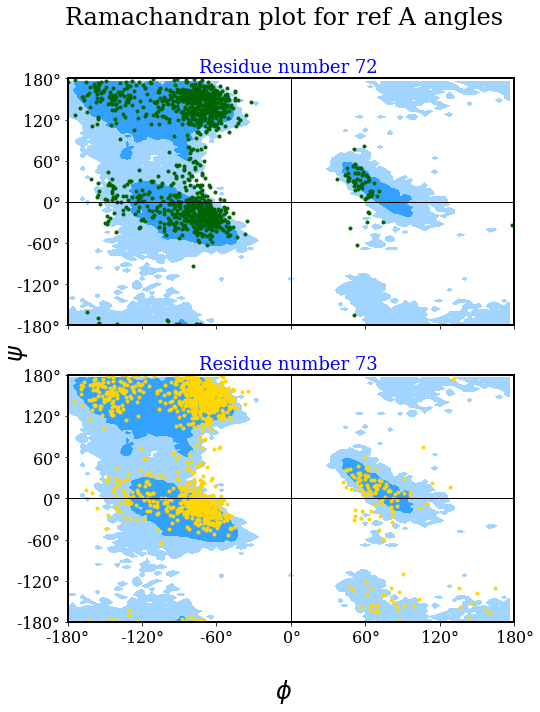

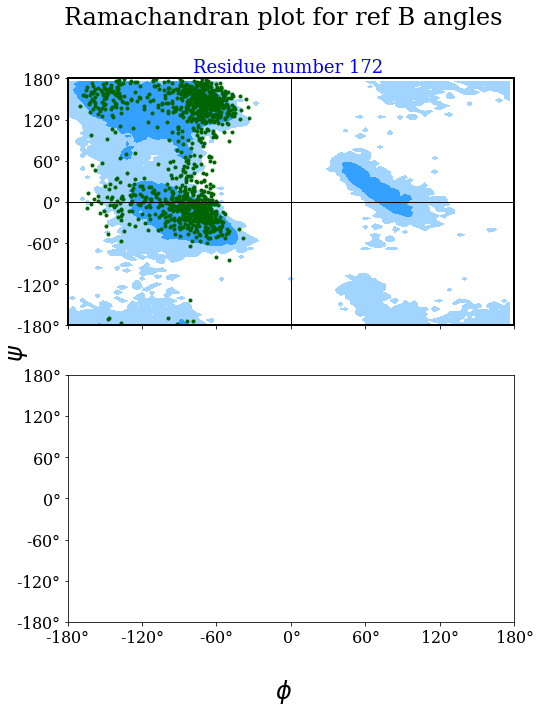

In [141]:
ramachandran_plot(dir2,targetresidsA_dual,"dualA",phi_dualA,psi_dualA)
ramachandran_plot(dir2,targetresidsB_dual,"dualB",phi_dualB,psi_dualB)
ramachandran_plot(dir1,targetresidsA,"refA",phi_refA,psi_refA)
ramachandran_plot(dir1,targetresidsB,"refB",phi_refB,psi_refB)

In [139]:
# How mke color for each angle 
color={
    f"{targetresidsA[0]}":"red",
    f"{targetresidsA[1]}":"darkgreen",
    f"{targetresidsB[1]}":"darkgreen",
    f"{targetresidsA[2]}":"gold",
    f"{targetresidsA[3]}":"indigo"
}
color

{'71': 'red',
 '72': 'darkgreen',
 '172': 'darkgreen',
 '73': 'gold',
 '74': 'indigo'}

In [137]:
targetresidsB[1]

172

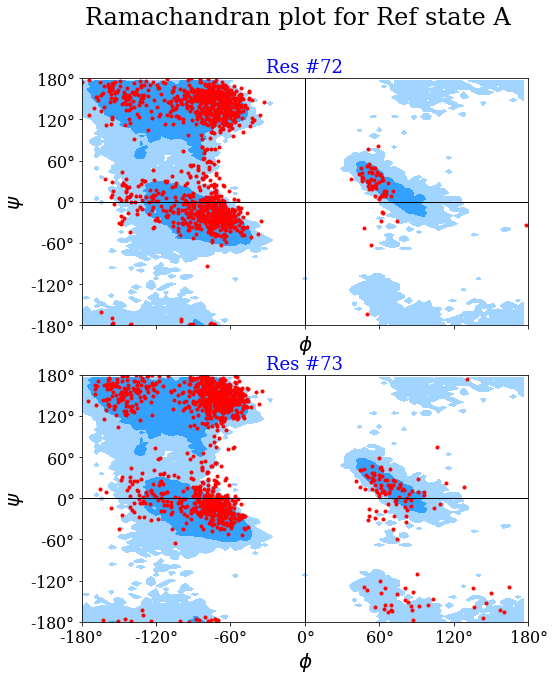

In [42]:
# 3) plot RAMACHANDRAN for angles of Ref A case ( 2 plots ) 
test=1 # TODO : to combine the two figures together u have to think in something like that 
# when the test = 2 run the dual cases when the test = 1 run ref cases 
fig, axes = plt.subplots(2, test, sharex=True, sharey=True ,figsize=(8,10)) #,figsize=(14,10)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
# i=[0, 0 , 1, 1]  # TODO : HOW to get this inofrmation automatic for each figure in diff 4 cases 
j=[0,1] 
for i in range(len(phi_refA)-1):
    axes[i].axis([-180, 180, -180, 180])
    axes[i].axhline(0, color='k', lw=1)
    axes[i].axvline(0, color='k', lw=1)
    axes[i].set(xticks=range(-180, 181, 60), yticks=range(-180, 181, 60),
        xlabel=r"$\phi$", ylabel=r"$\psi$")
    #control the label size after creation 
    axes[i].xaxis.label.set_size(20)
    axes[i].yaxis.label.set_size(20)
    degree_formatter = plt.matplotlib.ticker.StrMethodFormatter(
    r"{x:g}$\degree$")
    axes[i].xaxis.set_major_formatter(degree_formatter)
    axes[i].yaxis.set_major_formatter(degree_formatter)
    X, Y = np.meshgrid(np.arange(-180, 180, 4),np.arange(-180, 180, 4))
    levels = [1, 17, 15000]
    colors = ['#A1D4FF', '#35A1FF']
    axes[i].contourf(X, Y, np.load(Rama_ref), levels=levels, colors=colors)
    
axes[0].scatter(phi_refA[0],psi_refA[1],color='red', marker='.')  
axes[1].scatter(phi_refA[1],psi_refA[2],color='red', marker='.')  


# NOTE : To write omega in latex  $\omega$
# To write titke for each subplot 
axes[0].set_title(f"Res #{targetresidsA[1]}", fontsize=18, color='blue') #71 #TODO : write this number automatic 
axes[1].set_title(f"Res #{targetresidsA[2]}", fontsize=18, color='blue') #73

fig.suptitle('Ramachandran plot for Ref state A', fontsize=24, color='black')

# fig.supxlabel('Ramachandran plot for Ref state A ', fontsize=24, color='black') #TODO : pick this state  automatic 
# fig.supylabel('Distribution', fontsize=24, color='black')
plt.show()


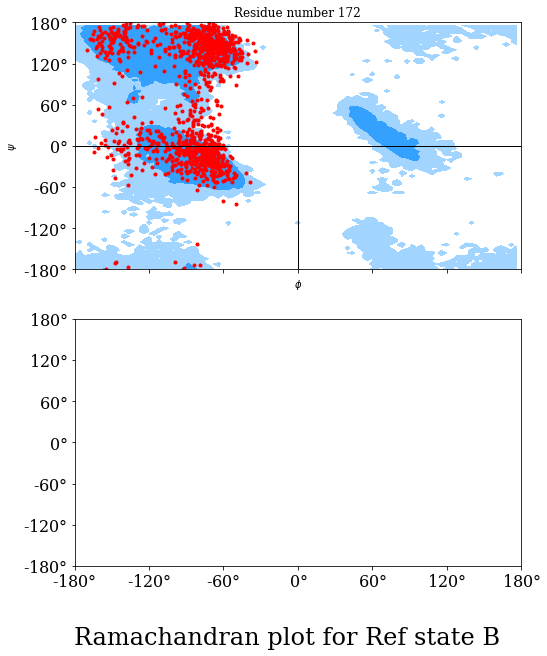

In [178]:
# 4) plot RAMACHANDRAN for angles of Ref A case ( 2 plots ) 
test=1 # TODO : to combine the two figures together u have to think in something like that 
# when the test = 2 run the dual cases when the test = 1 run ref cases 
fig, axes = plt.subplots(2, test, sharex=True, sharey=True ,figsize=(8,10)) #,figsize=(14,10)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
# i=[0, 0 , 1, 1]  # TODO : HOW to get this inofrmation automatic for each figure in diff 4 cases 
j=[0,1] 
for i in range(len(phi_refB)-1):
    axes[i].axis([-180, 180, -180, 180])
    axes[i].axhline(0, color='k', lw=1)
    axes[i].axvline(0, color='k', lw=1)
    axes[i].set(xticks=range(-180, 181, 60), yticks=range(-180, 181, 60),
        xlabel=r"$\phi$", ylabel=r"$\psi$")
    degree_formatter = plt.matplotlib.ticker.StrMethodFormatter(
    r"{x:g}$\degree$")
    axes[i].xaxis.set_major_formatter(degree_formatter)
    axes[i].yaxis.set_major_formatter(degree_formatter)
    X, Y = np.meshgrid(np.arange(-180, 180, 4),np.arange(-180, 180, 4))
    levels = [1, 17, 15000]
    colors = ['#A1D4FF', '#35A1FF']
    axes[i].contourf(X, Y, np.load(Rama_ref), levels=levels, colors=colors)
    
axes[0].scatter(phi_refB[0],psi_refB[1],color='red', marker='.')  
# axes[1].scatter(phi_refB[1],psi_refB[2],color='red', marker='.')  


# NOTE : To write omega in latex  $\omega$
# To write titke for each subplot 
axes[0].set_title("Residue number 172") #TODO : write this number automatic 
# axes[1].set_title("Residue number 73")



fig.supxlabel('Ramachandran plot for Ref state B ', fontsize=24, color='black') #TODO : pick this state  automatic 
# fig.supylabel('Distribution', fontsize=24, color='black')
plt.show()

In [29]:
# ramachandran_plot(dir1, "A", targetresidsA)